## Data Gathering

In [2]:
import pandas as pd
import numpy as np
import requests as re
import os
folder_name = 'Project_2_Udacity'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
url ='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = re.get(url)


In [3]:
#verifying if the operation was successful
response

<Response [200]>

In [4]:
#opening the file
with open(os.path.join(folder_name,url.split('/')[-1]),mode = 'wb') as file:
    file.write(response.content)

In [5]:
#crosschecking folder content
os.listdir(folder_name)

['image-predictions.tsv']

In [6]:
image_predictions_df = pd.read_csv('image-predictions.tsv', sep = '\t')
twitter_archive_df =  pd.read_csv('twitter-archive-enhanced.csv')

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

#### Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
#### These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

#### NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
#### df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
#### change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
#### NOTE TO REVIEWER: this student had mobile verification issues so the following
#### Twitter API code was sent to this student from a Udacity instructor
#### Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive_df.tweet_id.values
len(tweet_ids)

#### Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
#### Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [45]:
tweet_json_df = pd.read_json('tweet-json.txt', lines=True)

In [46]:
tweet_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

## Data Assessment

### a) Visual Assessment

In [47]:
image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [48]:
twitter_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [49]:
tweet_json_df.head(5)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


#### Addressing Tidiness
- For the twitter archive dataset, there are four columns(doggo,floofer,pupper,puppo) which are not individually variables but point to the same type of observation(dog stage)....hence they should be values for one column. 


- In the image predictions' dataset, the final breed cannot easily be assessed directly for visualisation

- the dataframes twitter_json,image predictions and twitter_enhanced_archive all observe data of the same nature(related data) hence can be merged into one table to avoid dealing with several tables.

### b) Programmatic assessment

#### Beginngs with the image_predictions datasets

In [50]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [51]:
image_predictions_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2070    False
2071    False
2072    False
2073    False
2074    False
Length: 2075, dtype: bool

In [52]:
image_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


#### Following with the tweet_json dataset

In [53]:
tweet_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [54]:
tweet_json_df.head(10)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
5,2017-07-29 00:08:17+00:00,891087950875897856,891087950875897856,Here we have a majestic great white breaching ...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,20562,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
6,2017-07-28 16:27:12+00:00,890971913173991426,890971913173991424,Meet Jax. He enjoys ice cream so much he gets ...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,12041,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
7,2017-07-28 00:22:40+00:00,890729181411237888,890729181411237888,When you watch your owner call another dog a g...,False,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,56848,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
8,2017-07-27 16:25:51+00:00,890609185150312448,890609185150312448,This is Zoey. She doesn't want to be one of th...,False,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,28226,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
9,2017-07-26 15:59:51+00:00,890240255349198849,890240255349198848,This is Cassie. She is a college pup. Studying...,False,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,32467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [55]:
tweet_json_df.possibly_sensitive.value_counts()

0.0    2211
Name: possibly_sensitive, dtype: int64

- Since all values here are unique we can erase this column and note that the was no sensitive comment, in order to reduce 
the number of columns and make our data look less crowdy

In [56]:
tweet_json_df.lang.value_counts()

en     2336
und       7
in        3
nl        3
eu        1
es        1
tl        1
ro        1
et        1
Name: lang, dtype: int64

In [57]:
tweet_json_df.query('lang=="tl"')

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
2187,2015-11-24 01:42:25+00:00,668967877119254528,668967877119254528,12/10 good shit Bubka\n@wane15,False,"[0, 29]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",6.689207e+17,...,161,False,False,NaN,NaN,tl,NaN,NaN,NaN,NaN


#### lastly, the twitter_archived dataset

In [58]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [59]:
sum(twitter_archive_df.retweeted_status_id.duplicated())

2174

In [60]:
sum(twitter_archive_df.tweet_id.duplicated())

0

#### Addressing Quality issues
- Columns with several empty enteries in the tweet_json dataset i.e in_reply_to_status_id, in_reply_to_status_id_str, in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name, quoted_status_id_str, quoted_status_id, quoted_status

- Columns without any data i.e geo, coordinates, place, contributors,

- The timestamp and retweeted_status_timestamp columns have incorrect datatypes i.e Object instead of datetime

- For the twitter_enhanced-archive dataset, the source column contains extra information in its records (added to the source of the tweet), which isn't of any use to us but rather adds a lot of jitter to the column

- For the tweet_json dataset, the source column contains extra information in its records as well, which isn't of any use to us but rather adds a lot of jitter to the column

- Several columns in tweet_json are not of major importance for our visualisation and only serve as a distraction.

- For the twitter-enhanced column, we only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.

- In the tweet_json data, the column lang contains information about the languages which is abbreviated but not easy to identify which language is being referred to

- the names column in the twitter archive enhanced dataset contains several invalid names.

#### Let us prepare for the cleaning phase by making a copy of each dataset.

In [143]:
#Let us make a copy of each dataframe and work on those for the cleaning
tj_copy = tweet_json_df.copy()
ta_copy=twitter_archive_df.copy()
ip_copy = image_predictions_df.copy()

## Data Cleaning

Let's begin with tweet_json dataset

#### Define

A lot of null data in the tweet_json dataset and columns with only few data

#### Code


In [144]:
# given this columns have extremely few entries and isn't of prior importance for our visualisation, we will delete them
# Deleting geo, coordinates, place, contributors columns
tj_copy.drop('geo', axis=1, inplace=True)
tj_copy.drop('coordinates', axis=1, inplace=True)
tj_copy.drop('place', axis=1, inplace=True)
tj_copy.drop('contributors', axis=1, inplace=True)

#### Test

In [145]:
tj_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

#### Define
Columns with several empty enteries in the tweet_json dataset 
#### Code

In [146]:
#Deleting columns with no entries using a for loop
delete = ['in_reply_to_status_id','in_reply_to_status_id_str','in_reply_to_user_id','in_reply_to_user_id_str','in_reply_to_screen_name'
         ,'quoted_status_id','quoted_status_id_str','quoted_status','retweeted_status']
for x in delete:
    tj_copy.drop(x, axis=1, inplace=True)

#### Test

In [147]:
tj_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   user                           2354 non-null   object             
 10  is_quote_status         

#### Define
Several columns are not of major importance for our visualisation and only serve as a distraction
#### Code

In [148]:
#drop columns which are not useful for us
drop = ['truncated','display_text_range','retweeted','entities','is_quote_status',
'extended_entities','possibly_sensitive','possibly_sensitive_appealable','favorited','user']
for y in drop:
    tj_copy.drop(y, axis=1, inplace=True)

#### Test

In [149]:
tj_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   created_at      2354 non-null   datetime64[ns, UTC]
 1   id              2354 non-null   int64              
 2   id_str          2354 non-null   int64              
 3   full_text       2354 non-null   object             
 4   source          2354 non-null   object             
 5   retweet_count   2354 non-null   int64              
 6   favorite_count  2354 non-null   int64              
 7   lang            2354 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(4), object(3)
memory usage: 147.2+ KB


#### Define
The source column contains extra information in its records added to the source of the tweet
#### Code

In [150]:
#extract the tweet source out of the link
tj_copy['source'] = tj_copy['source'].str.extract('^<a.+>(.+)</a>$')


#### Test

In [151]:
tj_copy['source'].value_counts()

Twitter for iPhone     2219
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

#### Define
Not easily identifiable languages
#### Code

In [152]:
#replacing entries of the lang column with their corresponding languages
#this values were colected here: https://www.iana.org/assignments/language-subtag-registry/language-subtag-registry
tj_copy.replace({'lang': {'en':'English', 
                              'und': 'Undetermined',
                              'in':'Indian',
                              'nl':'Dutch',
                              'eu':'Basque',
                              'es':'Spanish',
                              'tl':'tetela',
                              'ro':'Romanian',
                              'et':'Etruscan'}}, inplace=True)
        

#### Test

In [153]:
tj_copy.lang.value_counts()

English         2336
Undetermined       7
Indian             3
Dutch              3
Basque             1
Spanish            1
tetela             1
Romanian           1
Etruscan           1
Name: lang, dtype: int64

#### Define
The timestamp and retweeted_status_timestamp columns have incorrect datatypes i.e Object instead of datetime
#### Code

In [154]:

#Now we convert the timestamp columns' datatype from object to datetime
ta_copy['timestamp']=ta_copy['timestamp'].astype('datetime64[ns]')
ta_copy['retweeted_status_timestamp']=ta_copy['retweeted_status_timestamp'].astype('datetime64[ns]')

#### Test

In [155]:
ta_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   int64         
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2356 non-null   datetime64[ns]
 4   source                      2356 non-null   object        
 5   text                        2356 non-null   object        
 6   retweeted_status_id         181 non-null    float64       
 7   retweeted_status_user_id    181 non-null    float64       
 8   retweeted_status_timestamp  181 non-null    datetime64[ns]
 9   expanded_urls               2297 non-null   object        
 10  rating_numerator            2356 non-null   int64         
 11  rating_denominator          2356 non-null   int64       

Let's proceed with the twitter_enhanced dataset
#### Define
The source column contains extra information in its records added to the source of the tweet
#### Code


In [156]:
#extract the tweet source out of the link
ta_copy['source'] = ta_copy['source'].str.extract('^<a.+>(.+)</a>$')

#### Test

In [157]:
ta_copy['source'].value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

#### Define
For the twitter-archive-enhanced dataset, we only want original ratings (no retweets) that have images.
#### Code

In [158]:
#drop all rows with retweet_status_id
#first we get all rows whose retweet entry and replies to those tweets are not null, by their index
retweet = ta_copy[pd.notnull(ta_copy['retweeted_status_id'])].index
replies = ta_copy[pd.notnull(ta_copy['in_reply_to_user_id'])].index
#then we delete these rows
ta_copy.drop(retweet, axis=0, inplace=True)
ta_copy.drop(replies, axis=0, inplace=True)

#### Test

In [159]:
ta_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2097 non-null   int64         
 1   in_reply_to_status_id       0 non-null      float64       
 2   in_reply_to_user_id         0 non-null      float64       
 3   timestamp                   2097 non-null   datetime64[ns]
 4   source                      2097 non-null   object        
 5   text                        2097 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      datetime64[ns]
 9   expanded_urls               2094 non-null   object        
 10  rating_numerator            2097 non-null   int64         
 11  rating_denominator          2097 non-null   int64       

#### Define
For the twitter archive dataset, there are four columns() which are not individually variables but point to the same type of observation
#### Code

In [160]:
#create a list for the dog stages
dog_stages = ['doggo', 'floofer', 'pupper', 'puppo']

#create the column in the twitter_archive dataset's copy and replace none with nan
ta_copy[dog_stages] = ta_copy[dog_stages].replace('None', np.nan)

def join_all(x):
    return ', '.join(x.dropna().astype(str)) # 'puppo' 'doggo' 'NaN' ' NaN' = 'puppo, doggo, '

ta_copy['dog_stages'] = ta_copy[dog_stages].apply(join_all, axis=1)

#replace empty string with nan
ta_copy['dog_stages'] = ta_copy['dog_stages'].replace('', np.nan)

In [161]:
#drop the four column: doggo, floofer, pupper, puppo
ta_copy.drop(dog_stages, axis=1, inplace=True)

#### Test

In [162]:
ta_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2097 non-null   int64         
 1   in_reply_to_status_id       0 non-null      float64       
 2   in_reply_to_user_id         0 non-null      float64       
 3   timestamp                   2097 non-null   datetime64[ns]
 4   source                      2097 non-null   object        
 5   text                        2097 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      datetime64[ns]
 9   expanded_urls               2094 non-null   object        
 10  rating_numerator            2097 non-null   int64         
 11  rating_denominator          2097 non-null   int64       

In [163]:
ta_copy.dog_stages.value_counts()

pupper            221
doggo              72
puppo              23
floofer             9
doggo, pupper       9
doggo, puppo        1
doggo, floofer      1
Name: dog_stages, dtype: int64

#### Define
Invalid names in the name column
#### Code

In [164]:
ta_copy['name'].mask(ta_copy.name.str.match(r'^[a-z]+$'), inplace = True)

#### Test

In [165]:
ta_copy.name.str.islower().value_counts()

False    1993
Name: name, dtype: int64

#### Define
Information on the final breed is not obvious
#### Code

In [166]:

#use np.select to create array of accurately predicted breeds
condlist =  [(ip_copy['p1_dog'] == True), (ip_copy['p2_dog'] == True), (ip_copy['p3_dog'] == True)]

choicelist = [ip_copy['p1'],ip_copy['p2'], ip_copy['p3']]

choicelist2 = [ip_copy['p1_conf'], ip_copy['p2_conf'], ip_copy['p3_conf']]
#create columns to house the accurate breed and confidence degree
ip_copy['breed'] = np.select(condlist,choicelist, default='None' )
ip_copy['conf_degree'] = np.select(condlist,choicelist2, default=0 )

#### Test

In [167]:
ip_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   tweet_id     2075 non-null   int64  
 1   jpg_url      2075 non-null   object 
 2   img_num      2075 non-null   int64  
 3   p1           2075 non-null   object 
 4   p1_conf      2075 non-null   float64
 5   p1_dog       2075 non-null   bool   
 6   p2           2075 non-null   object 
 7   p2_conf      2075 non-null   float64
 8   p2_dog       2075 non-null   bool   
 9   p3           2075 non-null   object 
 10  p3_conf      2075 non-null   float64
 11  p3_dog       2075 non-null   bool   
 12  breed        2075 non-null   object 
 13  conf_degree  2075 non-null   float64
dtypes: bool(3), float64(4), int64(2), object(5)
memory usage: 184.5+ KB


#### Define
the datasets twitter_json,image_predictions and twitter_enhanced all observe data of the same nature(related data)
#### Code

In [95]:
#renaming columns to match for merging
tj_copy.rename(columns={'id':'tweet_id'}, inplace=True)
#combining image predictions and twitter archive datasets
combined_df = pd.merge(ip_copy, ta_copy, on='tweet_id', how='right')
#merging the combined df to the tweet_json df
combined_df = pd.merge(combined_df, tj_copy, on='tweet_id', how='inner')

In [96]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2097 non-null   int64              
 1   jpg_url                     1971 non-null   object             
 2   img_num                     1971 non-null   float64            
 3   p1                          1971 non-null   object             
 4   p1_conf                     1971 non-null   float64            
 5   p1_dog                      1971 non-null   object             
 6   p2                          1971 non-null   object             
 7   p2_conf                     1971 non-null   float64            
 8   p2_dog                      1971 non-null   object             
 9   p3                          1971 non-null   object             
 10  p3_conf                     1971 non-null   float64         

In [97]:
#dropping columns with no entries
out = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'
      ]
for x in out:
    combined_df.drop(x, axis=1, inplace=True)

In [98]:
combined_df.to_csv('twitter_master.csv', index=False)

##  Data Analysis and visualisation

In [99]:
import pandas as pd
df=pd.read_csv('twitter_master.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2097 non-null   int64  
 1   jpg_url             1971 non-null   object 
 2   img_num             1971 non-null   float64
 3   p1                  1971 non-null   object 
 4   p1_conf             1971 non-null   float64
 5   p1_dog              1971 non-null   object 
 6   p2                  1971 non-null   object 
 7   p2_conf             1971 non-null   float64
 8   p2_dog              1971 non-null   object 
 9   p3                  1971 non-null   object 
 10  p3_conf             1971 non-null   float64
 11  p3_dog              1971 non-null   object 
 12  breed               1971 non-null   object 
 13  conf_degree         1971 non-null   float64
 14  timestamp           2097 non-null   object 
 15  source_x            2097 non-null   object 
 16  text  

In [100]:
#let's go through our dataset and visualise/assess its columns
df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,rating_denominator,name,dog_stages,created_at,id_str,full_text,source_y,retweet_count,favorite_count,lang
1961,668528771708952576,https://pbs.twimg.com/media/CUcXXpxWUAAUJ__.jpg,1.0,Labrador_retriever,0.195835,True,kuvasz,0.121607,True,English_setter,...,10,Gòrdón,NaN,2015-11-22 20:37:34+00:00,668528771708952576,This is Gòrdón. He enjoys his razberrita by po...,Twitter for iPhone,242,496,English
671,761745352076779520,https://pbs.twimg.com/media/CpJDWqhW8AAFt45.jpg,1.0,paddle,0.393118,False,canoe,0.178088,False,lakeside,...,10,None,NaN,2016-08-06 02:06:59+00:00,761745352076779520,Guys.. we only rate dogs. Pls don't send any m...,Twitter for iPhone,979,4707,English
605,774314403806253056,https://pbs.twimg.com/media/Cr7q1VxWIAA5Nm7.jpg,3.0,Eskimo_dog,0.596045,True,Siberian_husky,0.223067,True,Saluki,...,10,None,NaN,2016-09-09 18:31:54+00:00,774314403806253056,I WAS SENT THE ACTUAL DOG IN THE PROFILE PIC B...,Twitter for iPhone,6478,24167,English
219,840696689258311684,https://pbs.twimg.com/media/C6rBLenU0AAr8MN.jpg,1.0,web_site,0.841768,False,rule,0.007087,False,envelope,...,10,None,NaN,2017-03-11 22:51:24+00:00,840696689258311680,I didn't even have to intervene. Took him 4 mi...,Twitter for iPhone,1116,13377,English
1682,674024893172875264,https://pbs.twimg.com/media/CVqeEKLW4AA1wXH.jpg,1.0,Pomeranian,0.648500,True,Pekinese,0.339835,True,Persian_cat,...,10,None,NaN,2015-12-08 00:37:11+00:00,674024893172875264,When you realize it doesn't matter how hard yo...,Twitter for iPhone,1360,1914,English


In [101]:
df.favorite_count.max()

132810

In [102]:
df.query('favorite_count == 132810')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,rating_denominator,name,dog_stages,created_at,id_str,full_text,source_y,retweet_count,favorite_count,lang
325,822872901745569793,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1.0,Lakeland_terrier,0.196015,True,Labrador_retriever,0.160329,True,Irish_terrier,...,10,None,puppo,2017-01-21 18:26:02+00:00,822872901745569792,Here's a super supportive puppo participating ...,Twitter for iPhone,48265,132810,English


In [103]:
df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf,conf_degree,rating_numerator,rating_denominator,id_str,retweet_count,favorite_count
count,2.097000e+03,1971.000000,1971.000000,1.971000e+03,1.971000e+03,1971.000000,2097.000000,2097.000000,2.097000e+03,2097.000000,2097.000000
mean,7.365594e+17,1.201928,0.594558,1.345850e-01,6.016556e-02,0.466219,12.189318,10.448736,7.365594e+17,2841.667620,8980.902241
std,6.710178e+16,0.559020,0.272126,1.010527e-01,5.094156e-02,0.339608,40.364996,6.645061,6.710178e+16,4709.238203,12199.636684
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10,0.000000,0.000000,2.000000,6.660209e+17,16.000000,81.000000
25%,6.768197e+17,1.000000,0.363091,5.339800e-02,1.608055e-02,0.140969,10.000000,10.000000,6.768197e+17,644.000000,2046.000000
50%,7.098528e+17,1.000000,0.587764,1.173970e-01,4.944380e-02,0.461076,11.000000,10.000000,7.098528e+17,1405.000000,4196.000000
75%,7.877176e+17,1.000000,0.847827,1.955655e-01,9.153815e-02,0.777087,12.000000,10.000000,7.877176e+17,3285.000000,11416.000000
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01,0.999956,1776.000000,170.000000,8.924206e+17,79515.000000,132810.000000


### What language do most users on this site use?

In [104]:
df['lang'].value_counts()

English         2089
Dutch              3
Indian             2
Undetermined       1
Basque             1
Etruscan           1
Name: lang, dtype: int64

### Which source did most users tweet from?

Text(0.5, 1.0, 'Tweet source counts')

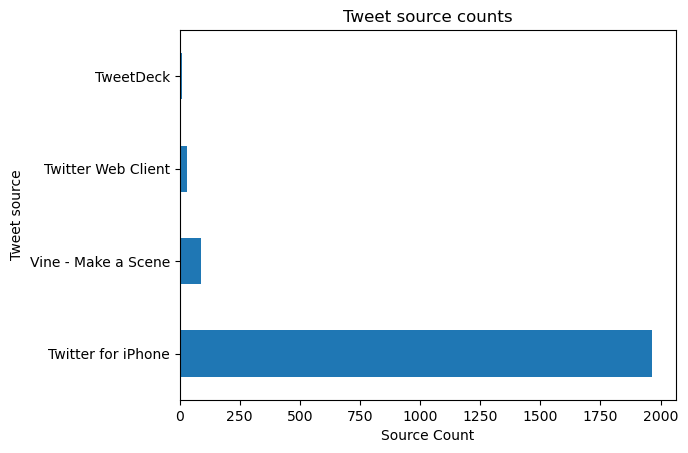

In [105]:
import matplotlib.pyplot as plt
%matplotlib inline

df['source_x'].value_counts().plot(kind='barh');
plt.xlabel("Source Count")
plt.ylabel("Tweet source")
plt.title("Tweet source counts")


### To which breed was attached the highest rating?

In [106]:
top_5 = df.nlargest(10,'rating_numerator', keep='all')
top_5[['breed','rating_numerator']].style.hide_index()

C:\Users\Daisy\AppData\Local\Temp\ipykernel_16716\2809578203.py:2: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  top_5[['breed','rating_numerator']].style.hide_index()


breed,rating_numerator
None,1776
None,420
None,204
Labrador_retriever,165
chow,144
soft-coated_wheaten_terrier,121
golden_retriever,99
Labrador_retriever,88
West_Highland_white_terrier,84
soft-coated_wheaten_terrier,80


Apparently, twitter users seem to love Labrador_retrievers and terriers!!!

### How accurate was our model in its predictions?

In [107]:
df['conf_degree'].describe()

count    1971.000000
mean        0.466219
std         0.339608
min         0.000000
25%         0.140969
50%         0.461076
75%         0.777087
max         0.999956
Name: conf_degree, dtype: float64

We can observe that though our standard deviation is lower than the mean, it is more than 0.5 of its value...relatively it could be considered large and can be seen as an indicator that our model is not performing optimally and further investigation could be beneficial.